# Principal Component Analysis (PCA):

## Visualization of the Theory and Some Applications

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. Dimensions are the features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.


At the earlier stages of machine learning, PCA was a common algorithm to be used as a tool for visualization, for noise filtering, for feature extraction and engineering etc.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #library for making statistical graphics
from sklearn.decomposition import PCA

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions. It becomes much more clear when applied to high-dimensional data.


In [2]:
from sklearn.datasets import load_digits # load the hand written digit(0-9) dataset from sklearn library
digits = load_digits() # Load the digits
digits.data.shape # check the shape of the digit dataset where 1797 is the total number of images in the dataset and 64 is the dimension of the image.

(1797, 64)

This data consists of 8×8 pixel images, that means each image is 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [3]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data) # Fit the model with digits data i.e 0 to 9 digits and apply the dimensionality reduction on digits data. original digit data is of 64 i.e (8*8) dimensional.
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

[0 1 2 ... 8 9 8]


<ipython-input-4-574033958e72>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


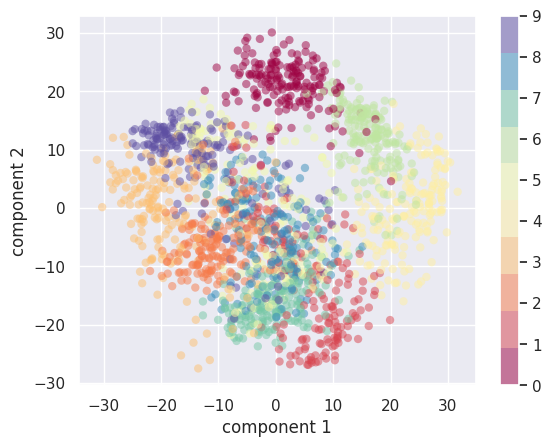

In [4]:
# plot the reducted 2 dimensional digits data
print(digits.target)
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1') # x-axis direction have component 1
plt.ylabel('component 2') # y-axis direction have component 2
plt.colorbar(); # plot the colorbar to identify the each digits with different colors.

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### What do the components mean?

Now, what does the reduced dimensions *mean*?
We can understand this in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Let we have a set of basis or representative images {${\rm image~1}, {\rm image~2} \cdots {\rm image~64}$} for the dataset.
To construct any image of the dataset, we multiply each element $x_i$ of the vector $x$ by the corresponding basis image, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm image~1} + x_2 \cdot{\rm image~2} + x_3 \cdot{\rm (pixel~3)} \cdots + x_{64} \cdot{\rm image~64}
$$

$x_i$ can be thought of a coefficint or constant for a particular image. Now, we can reduce the dimension of this image by ignoring (zeroing) all but a few of these basis pixels.
For example, if we use only the first eight pixels ${\rm image~1}, {\rm image~2} \cdots {\rm image~8}$ (or $c_1, c_2 \cdots c_8$ in the figure below), we get an eight-dimensional projection of an image. However, it is not very reflective of the whole image as we've thrown out nearly 90% of the pixels!

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pixel-components.png?raw=1)


The upper row of panels shows the individual basis pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
If we have continued this sequence and use all 64 pixels, we could recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA can be thought of as a process of choosing optimal basis, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pca-components.png?raw=1)


Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!

In this way, PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

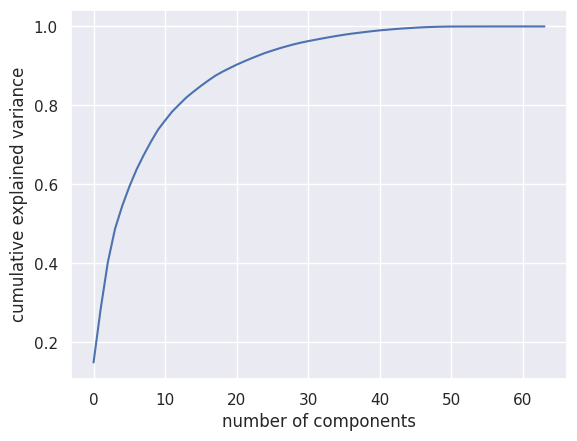

In [5]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # Cumulative sum of eigenvalues; This will be used to create step plot for visualizing the variance explained by each principal component.
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## Reconstructing an image using principal components for 99%, 95%, 90%, and 85% of Explained Variance

In [6]:
from sklearn.datasets import fetch_openml

digits = fetch_openml('mnist_784')

pca = PCA().fit(digits.data)
print(f"Number of components : \n {pca.n_components_}")
print(f"Dimension of components : \n {pca.components_.shape[1]}")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of components : 
 784
Dimension of components : 
 784


In [7]:
# Summing explained variance
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] # Equivalent to pca.explained_variance_ratio_
print(var_exp[0:5])

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)
# print(cum_var_exp)

# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp > 85) +1]
print(f"Number of components corresponding to 99%, 95%, 90%, and 85% of Explained Variance: \n {componentsVariance}")

[9.746115922494738, 7.155444586878719, 6.149530980723037, 5.403384528548186, 4.8889337038778935]
Number of components corresponding to 99%, 95%, 90%, and 85% of Explained Variance: 
 [331, 154, 87, 59]


In [8]:
def explainedVariance(percentage, images):
    # percentage should be a decimal from 0 to 1
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

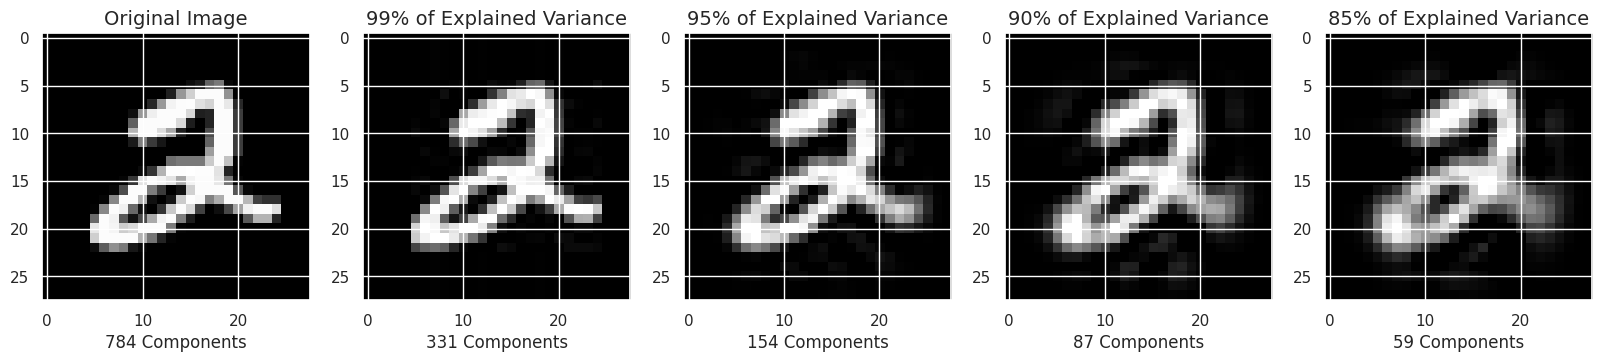

In [9]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(digits.data.iloc[5].to_numpy().reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 99% explained variance or 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, digits.data.iloc[5].to_numpy().reshape(28, 28)),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 95% explained variance or 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, digits.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 90% explained variance or 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, digits.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 85% explained variance or 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, digits.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

## PCA as Feature Extractor or Representation of Data: Eigenfaces

A feature selector for facial recognition can be biult by using the labeled faces in the Wild dataset made available through Scikit-Learn:

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's take a look at the principal axes that span this dataset.
Because this is a large dataset, we will use ``RandomizedPCA``—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard ``PCA`` estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000).
We will take a look at the first 150 components:

In [ ]:
pca = PCA(n_components=150, svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

As the principal components are technically known as "eigenvectors,"
for images these are usually called "eigenfaces", though these look pretty creepy.

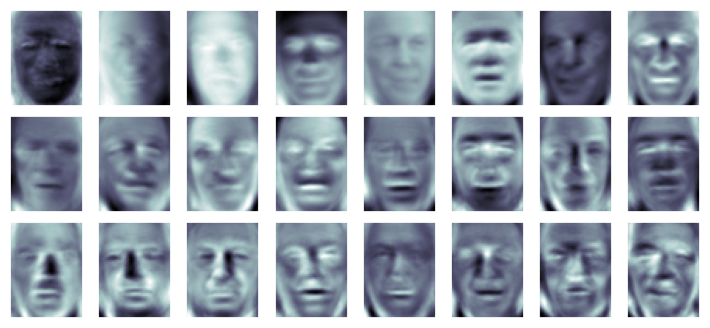

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

We can have interesting observations here: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be highlighting certain features, such as eyes, noses, and lips etc.
Let's see how much of the data information the projection is preserving by computing the cumulative variance of these components:

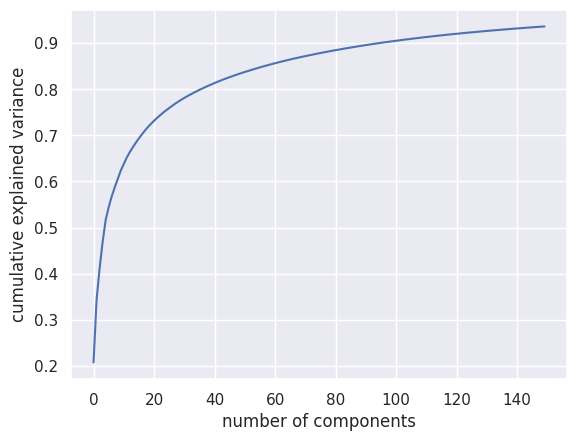

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance.
So we can expect that using these 150 components, we may recover most of the essential characteristics of the data.

In [ ]:
# Compute the components and projected faces
pca = PCA(n_components=150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

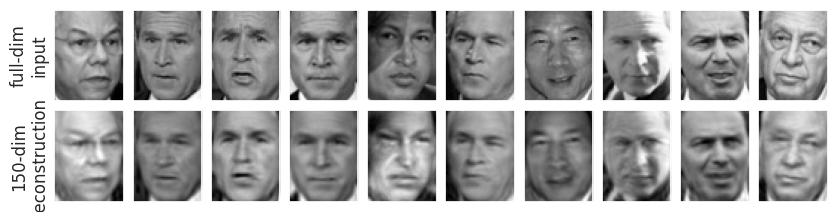

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.
This visualization makes clear that PCA is quite good at feature selection. Although it reduced the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image.
So, point to be noted that our classification algorithm can be trained on 150-dimensional data rather than 3,000-dimensional data! This depending on the particular algorithm we choose, can lead to a much more efficient classification.

## Principal Component Analysis Summary

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).


Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data. Weakness of PCA is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains some of these interesting variants on PCA.